## 준비

In [1]:
import os
os.chdir('C:/Users/syjan/Desktop/암연구소 인턴/CRC_research') #디렉토리 입력

In [6]:
#필요한 패키지 다운로드
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import dataframe_image as dfi
from sklearn.preprocessing import StandardScaler, RobustScaler

## 데이터 설명

### 1) df1
- `CAN_ID` : 환자 ID
- `food_group`: 식품군 번호 (1~36)
- `food_group_name`: 식품군명
- `energy`: 환자별 해당 식품군 내 식품으로 섭취한 에너지량 (kcal)
- `energy_new` : 잔차법을 적용해 보정한 에너지량 (kcal)
- `energy_total`: 환자별 섭취한 에너지량 총합 (kcal)

In [3]:
df1 = pd.read_csv('fin_df.csv').drop(columns=['res', 'b0', 'b1', 'mu_hat', 'CRClocationmain'])
df1.head()

,CAN_ID,age,sex,BMI,smoking,Drinking,Comorbid,postopcomplication,AJCCstage,OS,OS_time,food_group,food_group_name,energy,weight,energy_total,weight_new
0,A316,57,1,26.92,2,2,1,1,0,0,2236,1,Refined grains,974.607249,655.300873,2131.523981,574.809029
1,A316,57,1,26.92,2,2,1,1,0,0,2236,2,Whole grains,26.386940,7.536028,2131.523981,3.737780
2,A316,57,1,26.92,2,2,1,1,0,0,2236,3,Tubers and roots,29.952173,39.196089,2131.523981,28.587219
3,A316,57,1,26.92,2,2,1,1,0,0,2236,4,Noodles,82.440702,39.706686,2131.523981,24.362132
4,A316,57,1,26.92,2,2,1,1,0,0,2236,5,Rice cakes,43.039602,18.332600,2131.523981,9.055300


In [4]:
df1.query("CAN_ID=='A001'")

,CAN_ID,age,sex,BMI,smoking,Drinking,Comorbid,postopcomplication,AJCCstage,OS,OS_time,food_group,food_group_name,energy,weight,energy_total,weight_new
17115,A001,49,1,25.26,1,2,0,0,2,0,2683,1,Refined grains,1346.400000,9.900000e+02,2244.810576,8.402597e+02
17116,A001,49,1,25.26,1,2,0,0,2,0,2683,2,Whole grains,0.000000,1.000000e-07,2244.810576,4.158499e-08
17117,A001,49,1,25.26,1,2,0,0,2,0,2683,3,Tubers and roots,18.334477,2.751003e+01,2244.810576,1.853409e+01
17118,A001,49,1,25.26,1,2,0,0,2,0,2683,4,Noodles,129.534377,5.621278e+01,2244.810576,3.050488e+01
17119,A001,49,1,25.26,1,2,0,0,2,0,2683,5,Rice cakes,0.000000,1.000000e-07,2244.810576,4.137078e-08
17120,A001,49,1,25.26,1,2,0,0,2,0,2683,6,Bread,15.651144,3.771360e+00,2244.810576,9.712327e-01
17121,A001,49,1,25.26,1,2,0,0,2,0,2683,7,Cereals and snacks,298.258006,5.908464e+01,2244.810576,1.270498e+01
17122,A001,49,1,25.26,1,2,0,0,2,0,2683,8,Pizza and hamburger,0.000000,1.000000e-07,2244.810576,1.844844e-08
17123,A001,49,1,25.26,1,2,0,0,2,0,2683,9,Cakes and sweets,27.406121,7.096864e+00,2244.810576,3.942128e+00
17124,A001,49,1,25.26,1,2,0,0,2,0,2683,10,Legumes,9.645941,2.572872e+00,2244.810576,1.270830e+00


In [7]:
food_group_summary = df1.groupby('food_group_name').weight.describe()[['mean', 'std']].round(2).reset_index().rename(columns={'mean':'평균', 'std':'표준편차', 'food_group_name':'식품군명'})
dfi.export(food_group_summary, "food_group_summary.png")

In [8]:
food_group_summary

,식품군명,평균,표준편차
0,Bread,15.70,36.78
1,Cakes and sweets,10.78,13.47
2,Carbonated beverages,18.72,66.71
3,Cereals and snacks,4.44,15.33
4,Coffee and tea,40.33,80.07
5,Condiments and seasonings,16.56,14.26
6,Dairy Products,38.97,59.46
7,Eggs,22.26,24.34
8,Fish,22.15,25.50
9,Fruit products,29.67,50.51


In [35]:
id_list = df1.CAN_ID.unique().tolist()
patient_info = pd.read_csv('patient_info.csv')
patient_info = patient_info[patient_info.CAN_ID.isin(id_list)]
patient_info[['sex', 'smoking', 'Drinking', 'OS', 'PFS', 'AJCCstage', 'Comorbid', 'postopcomplication']] = patient_info[['sex', 'smoking', 'Drinking', 'OS', 'PFS', 'AJCCstage', 'Comorbid', 'postopcomplication']].astype(object)
num = patient_info.drop(columns='CAN_ID').describe().round(2).transpose()
num.index = ['나이','BMI', '생존기간', '무진행기간']
cat_df = patient_info[['sex', 'smoking', 'Drinking', 'OS', 'PFS', 'AJCCstage', 'Comorbid', 'postopcomplication', 'CRClocationmain']]
num

,count,mean,std,min,25%,50%,75%,max
나이,525.0,61.16,11.17,30.00,53.00,62.00,69.00,87.00
BMI,525.0,24.13,3.41,15.46,22.01,23.83,26.11,38.32
생존기간,525.0,1604.38,884.86,7.00,570.00,1863.00,2414.00,2683.00
무진행기간,525.0,968.63,669.29,7.00,373.00,774.00,1634.00,2647.00


In [36]:
cat_df.columns = ['성별', '흡연력', '음주력', '생존여부', '무진행여부', '병기', '동질질환유무', '수술후합병증유무', '대장암 주위치']
cat_df

,성별,흡연력,음주력,생존여부,무진행여부,병기,동질질환유무,수술후합병증유무,대장암 주위치
0,1,2,2,0,0,0,1,1,Colon
1,1,1,2,0,0,0,1,0,Colon
2,1,0,0,0,0,0,0,1,Colon
3,2,0,2,0,0,0,0,0,Rectum
4,1,0,0,0,0,0,1,0,Rectum
...,...,...,...,...,...,...,...,...,...
529,1,1,0,0,1,4,1,0,Colon
530,1,2,0,0,0,2,1,1,Rectum
531,2,0,0,0,0,3,1,1,Rectum
532,1,2,2,0,0,2,0,1,Rectum


In [37]:
a = cat_df.melt(value_name='값', var_name='변수')
d= a.groupby(['변수', '값']).size().reset_index(name='count')
d['perc'] = d['count'].div(d.groupby('변수')['count'].transform('sum')).mul(100)

d = d.reset_index(drop=True).set_index(['변수','값']).round(2)
d.round(2)
dfi.export(d, "patient_summary.png")

In [39]:
for i in ['smoking', 'Drinking', 'Comorbid', 'postopcomplication','AJCCstage', 'OS', 'PFS']:
    print(patient_info.groupby('OS')[i].value_counts())

OS  smoking
0   0          324
    2           67
    1           50
1   0           66
    2           16
    1            2
Name: smoking, dtype: int64
OS  Drinking
0   0           285
    2           156
1   0            49
    2            35
Name: Drinking, dtype: int64
OS  Comorbid
0   1           283
    0           158
1   1            50
    0            34
Name: Comorbid, dtype: int64
OS  postopcomplication
0   0                     314
    1                     127
1   0                      47
    1                      37
Name: postopcomplication, dtype: int64
OS  AJCCstage
0   3            182
    2            122
    1            102
    4             25
    0             10
1   4             40
    3             25
    2             14
    1              5
Name: AJCCstage, dtype: int64
OS  OS
0   0     441
1   1      84
Name: OS, dtype: int64
OS  PFS
0   0      410
    1       31
1   1       84
Name: PFS, dtype: int64


In [40]:
patient_info[['age', 'BMI', 'PFS_time','OS_time']].describe().round(2)

,age,BMI,PFS_time,OS_time
count,525.00,525.00,525.00,525.00
mean,61.16,24.13,968.63,1604.38
std,11.17,3.41,669.29,884.86
min,30.00,15.46,7.00,7.00
25%,53.00,22.01,373.00,570.00
50%,62.00,23.83,774.00,1863.00
75%,69.00,26.11,1634.00,2414.00
max,87.00,38.32,2647.00,2683.00


In [41]:
food_group_info = df1[['food_group', 'food_group_name']].drop_duplicates().sort_values(by='food_group').reset_index(drop=True)
food_group_info['food_group'] = food_group_info['food_group'].apply(lambda x: 'food'+str(x))
food_group_info = food_group_info.set_index('food_group')
food_group_name = food_group_info.food_group_name.tolist()
food_group_info

,food_group_name
food_group,
food1,Refined grains
food2,Whole grains
food3,Tubers and roots
food4,Noodles
food5,Rice cakes
food6,Bread
food7,Cereals and snacks
food8,Pizza and hamburger
food9,Cakes and sweets


### 2) df2  
: df1의 pivot버전
- `energy_total`: 섭취한 에너지량 총합 (kcal)
- `g1` ~ `g36` : 보정된 식품군별 에너지량 (kcal, df1의 `energy_new`에 해당)

In [44]:
df2 = pd.read_csv('ffq_table.csv')
df2

,CAN_ID,food1,food2,food3,food4,food5,food6,food7,food8,food9,...,food26,food27,food28,food29,food30,food31,food32,food33,food34,food35
0,A001,840.259692,4.158499e-08,18.534095,3.050488e+01,4.137078e-08,9.712327e-01,1.270498e+01,1.844844e-08,3.942128,...,7.105696,38.843714,89.067131,0.535424,70.697279,1.151074,4.507679,11.359526,1.563419e-08,1.678606
1,A002,534.812559,3.146878e-08,46.405763,2.760279e+01,2.734735e+00,3.211420e+00,1.063204e+00,1.078265e+00,5.691029,...,3.424226,56.060969,56.836021,0.779599,49.493388,3.377317,5.049194,12.033150,8.670580e-09,2.387001
2,A003,444.329925,1.384461e-08,53.497670,1.895194e+01,6.841525e-01,1.690860e+00,5.046604e-01,1.847800e-01,3.461358,...,19.745110,58.608704,78.556582,15.905259,164.264193,14.266109,2.539097,14.916388,2.545041e-01,2.375746
3,A004,758.884875,3.658783e+01,38.631593,9.273615e+00,2.440232e-07,3.940170e-07,4.728068e-07,5.520006e-07,58.344515,...,18.548882,34.369124,104.989217,2.669236,80.758987,6.464229,0.173960,13.036342,6.525256e-07,12.763266
4,A005,758.235420,3.642061e+01,68.427048,1.848999e-07,2.429014e-07,3.912362e-07,4.690281e-07,5.471512e-07,0.604151,...,17.667171,63.699758,76.065422,4.915275,118.033313,0.250681,0.395217,25.097649,6.462343e-07,13.719131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,A535,296.202734,4.910096e-07,260.065351,3.957749e+01,4.253919e+01,2.974249e+02,1.623931e-06,2.144090e-06,12.656551,...,130.717109,167.806501,123.567337,9.602564,120.853835,6.099071,7.380283,31.985095,2.894751e-06,14.510974
521,A537,276.566854,4.038581e-07,24.111808,6.005726e+01,1.119736e+02,2.224335e+01,1.445244e+01,1.471551e-06,14.759645,...,227.082428,244.871603,93.971287,5.744713,240.125223,2.706339,2.533054,41.325508,8.206290e+02,143.045283
522,A538,555.478265,3.171489e+00,35.064259,1.136695e+00,3.140268e+01,2.623256e-08,2.195737e-08,1.887756e-08,1.657199,...,24.821000,188.690115,188.326209,19.871125,115.455904,13.001209,2.343981,10.484719,1.603391e-08,7.171628
523,A539,947.061702,7.855550e-08,23.214502,2.661465e+01,7.844398e-08,6.885398e-08,6.552138e-08,6.281729e-08,0.412235,...,5.580992,25.875912,57.523251,7.729493,144.748187,1.641733,0.820804,7.904519,1.000314e+01,8.058176


In [45]:
df3 = pd.read_csv('ffq_table_wo_res.csv')
df3

,CAN_ID,food1,food2,food3,food4,food5,food6,food7,food8,food9,...,food26,food27,food28,food29,food30,food31,food32,food33,food34,food35
0,A001,990.000000,0.000000,27.510028,56.212779,0.00000,3.771360,59.084640,0.000,7.096864,...,14.525063,54.790088,128.465364,0.907113,93.428050,1.972823,6.777016,16.628488,0.000,4.242780
1,A002,663.818029,0.000000,78.087253,61.766396,8.74965,19.188525,8.056928,9.999,12.349288,...,8.784508,88.205865,92.092731,1.561611,71.463600,6.868933,8.641006,19.881345,0.000,8.100000
2,A003,642.987113,0.000000,130.272053,75.140810,4.99950,35.958526,16.113856,8.333,13.020897,...,98.898859,127.230142,179.324946,52.180297,307.880550,48.038138,6.364118,35.204492,16.666,19.199100
3,A004,642.965687,15.072057,25.916550,4.999500,0.00000,0.000000,0.000000,0.000,32.204498,...,9.004609,24.276143,72.504394,1.566604,60.927500,3.749850,0.115202,8.869155,0.000,4.999500
4,A005,642.965687,15.072057,46.000000,0.000000,0.00000,0.000000,0.000000,0.000,0.334499,...,8.608653,45.074288,52.630484,2.892780,89.178300,0.145827,0.262282,17.108958,0.000,5.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,A535,220.000000,0.000000,127.062500,13.061832,8.58285,25.401552,0.000000,0.000,4.357554,...,35.743272,89.927707,63.594512,3.690986,72.892300,2.295688,3.523009,16.025559,0.000,2.700000
521,A537,213.056361,0.000000,12.863566,22.711168,27.49910,2.569743,1.253208,0.000,5.792494,...,72.810658,141.673860,52.472894,2.483206,154.106795,1.148520,1.324102,22.539187,42.856,32.720556
522,A538,653.009964,7.536028,51.766750,2.077295,74.99950,0.000000,0.000000,0.000,2.959625,...,50.246564,264.909883,270.280880,33.424997,152.000000,22.120015,3.504536,15.268555,0.000,17.899500
523,A539,990.763560,0.000000,25.878626,31.488022,0.00000,0.000000,0.000000,0.000,0.484599,...,6.794027,28.443803,63.620960,8.935825,156.285430,1.904002,0.918232,8.778076,16.666,10.399500


In [58]:
x = df3.drop(columns=['CAN_ID'])
#StandardScaler() : 열마다 평균이 0, 표쥰편차가 1이 되도록 변환
x_scaled = StandardScaler().fit_transform(x)
x_scaled

array([[ 2.29546709, -0.97053526, -0.36836558, ...,  0.00465621,
        -0.28092144, -0.45110655],
       [ 0.67809495, -0.97053526,  0.57177823, ...,  0.23306241,
        -0.28092144, -0.40288858],
       [ 0.57480493, -0.97053526,  1.54180412, ...,  1.3090093 ,
        -0.030852  , -0.264142  ],
       ...,
       [ 0.62450319,  0.17912906,  0.08252526, ..., -0.09083436,
        -0.28092144, -0.28038791],
       [ 2.2992532 , -0.97053526, -0.39869055, ..., -0.54657696,
        -0.030852  , -0.3741432 ],
       [ 0.62450319,  0.17912906, -0.68901775, ..., -0.53870817,
        -0.18089967, -0.23913559]])

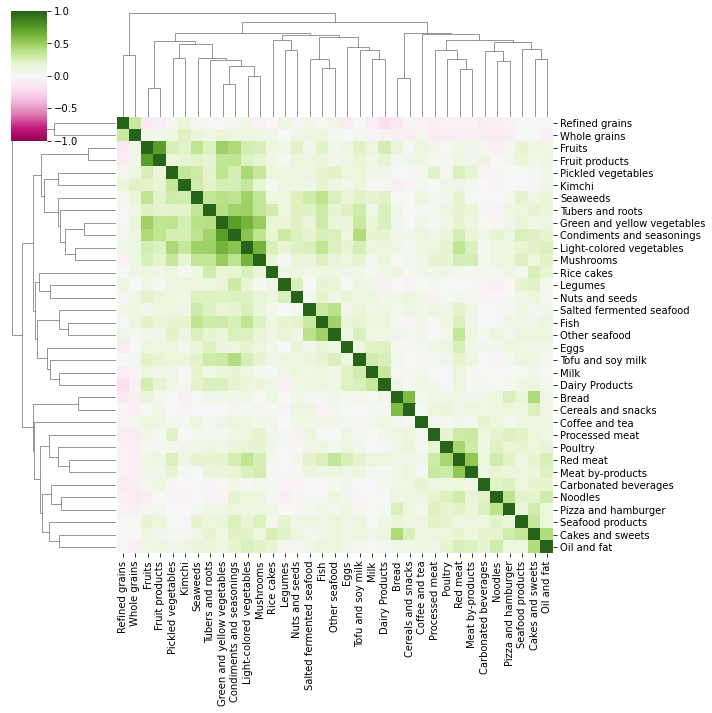

In [59]:
x.columns = food_group_name
sns.clustermap(x.corr(),vmin=-1, vmax=1, cmap="PiYG")

In [60]:
c = x.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False).reset_index(name='c').query('c!=1')
so

,level_0,level_1,c
35,Fruits,Fruit products,0.749659
36,Fruit products,Fruits,0.749659
37,Green and yellow vegetables,Condiments and seasonings,0.749033
38,Condiments and seasonings,Green and yellow vegetables,0.749033
39,Light-colored vegetables,Green and yellow vegetables,0.637178
...,...,...,...
1220,Carbonated beverages,Tofu and soy milk,0.001613
1221,Kimchi,Processed meat,0.001197
1222,Processed meat,Kimchi,0.001197
1223,Legumes,Salted fermented seafood,0.000607


In [61]:
food_info = x.describe().transpose().round(2)
dfi.export(food_info, "food_info.png")

## 식이패턴 분석

In [62]:
from sklearn.decomposition import PCA
#from pca import pca

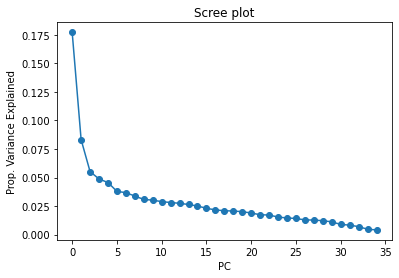

In [63]:
pca = PCA().fit(x_scaled)

def scree_plot_pca(pca): 
    num_components = len(pca.explained_variance_ratio_) 
    ind = np.arange(num_components) 
    vals = pca.explained_variance_ratio_ 
    plt.plot(ind, vals)
    plt.scatter(ind, vals)
    plt.xlabel("PC") 
    plt.ylabel("Prop. Variance Explained") 
    plt.title('Scree plot')

scree_plot_pca(pca)

In [64]:
np.cumsum(pca.explained_variance_ratio_)

array([0.17731947, 0.26048425, 0.31565842, 0.36438423, 0.40997839,
       0.44783994, 0.48455474, 0.51831048, 0.54908422, 0.5792448 ,
       0.60808732, 0.63617295, 0.66355114, 0.68990409, 0.71493014,
       0.73794318, 0.75955711, 0.78040298, 0.80104916, 0.82108945,
       0.83996481, 0.8573234 , 0.87443227, 0.88975127, 0.90428065,
       0.91840091, 0.9312152 , 0.94393362, 0.95604514, 0.96720971,
       0.97606182, 0.98434505, 0.99127127, 0.99593375, 1.        ])

In [88]:
pca_out = PCA(n_components=3).fit(x_scaled)
loadings =  pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['food group'] = food_group_name
loadings_df = loadings_df.set_index('food group')
loadings_df[['PC1', 'PC2', 'PC3']].style.highlight_max(color = 'lightgreen', axis = 1)

,PC1,PC2,PC3
food group,,,
Refined grains,-0.009759,-0.136083,-0.280869
Whole grains,0.048991,-0.229264,-0.133536
Tubers and roots,0.239188,-0.102202,0.011188
Noodles,0.080808,0.332166,-0.108807
Rice cakes,0.125560,0.020480,0.050169
Bread,0.085791,0.257381,0.304156
Cereals and snacks,0.059180,0.251035,0.213246
Pizza and hamburger,0.101559,0.288771,0.019598
Cakes and sweets,0.155282,0.260666,0.149883


In [69]:
loadings_df2 = loadings_df.copy().round(2)
loadings_df2.columns= ['Balanced', 'Meat&Carbs','Fruits&Dairy']
for col in loadings_df2.columns:
    loadings_df2[col].values[abs(loadings_df2[col].values) < 0.2] = 0
loadings_df2 = loadings_df2.replace(0,'-').reset_index()
loadings_df2

,food group,Balanced,Meat&Carbs,Fruits&Dairy
0,Refined grains,-,-,-0.28
1,Whole grains,-,-0.23,-
2,Tubers and roots,0.24,-,-
3,Noodles,-,0.33,-
4,Rice cakes,-,-,-
5,Bread,-,0.26,0.3
6,Cereals and snacks,-,0.25,0.21
7,Pizza and hamburger,-,0.29,-
8,Cakes and sweets,-,0.26,-
9,Legumes,-,-,-


In [70]:
dfi.export(loadings_df2, "PCA_loading_2.png")

In [72]:
#PC score for each obsv (patient)
x_pca=pca_out.fit_transform(x_scaled)
pca_columns=['Balanced', 'Meat&Carbs','Fruits&Dairy']
pca_result = pd.DataFrame(x_pca,columns=pca_columns)
pca_result['CAN_ID'] = df3['CAN_ID']
pca_result.head()

,Balanced,Meat&Carbs,Fruits&Dairy,CAN_ID
0,-0.746815,0.992072,-0.337560,A001
1,0.319052,1.710819,-1.058762,A002
2,8.240501,0.046535,-1.168232,A003
3,-2.237372,-0.830501,-0.121498,A004
4,-2.376691,-1.585516,-0.425515,A005


In [73]:
pca_add = patient_info.merge(pca_result)
pca_add

,CAN_ID,age,sex,BMI,smoking,Drinking,CRClocationmain,Comorbid,postopcomplication,AJCCstage,OS,OS_time,PFS,PFS_time,Balanced,Meat&Carbs,Fruits&Dairy
0,A316,57,1,26.92,2,2,Colon,1,1,0,0,2236,0,1521,1.128903,0.451262,-1.201615
1,A081,61,1,23.93,1,2,Colon,1,0,0,0,2557,0,288,0.426513,-2.143846,0.239409
2,A203,53,1,23.47,0,0,Colon,0,1,0,0,2366,0,1485,-2.102825,0.953432,0.284175
3,A070,44,2,22.81,0,2,Rectum,0,0,0,0,2577,0,1877,-1.795077,0.171687,0.520043
4,A206,71,1,26.18,0,0,Rectum,1,0,0,0,2367,0,1535,-2.832902,-0.408028,0.017159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,A499,68,1,26.10,1,0,Colon,1,0,4,0,457,1,413,-1.912527,-0.979011,-0.793487
521,A224,60,1,19.64,2,0,Rectum,1,1,2,0,2354,0,1550,1.040024,-0.805544,-1.378346
522,A337,55,2,23.12,0,0,Rectum,1,1,3,0,1529,0,759,-1.073321,-1.576339,0.579466
523,A202,55,1,16.39,2,2,Rectum,0,1,2,0,2366,0,1694,-2.822345,-0.804602,-0.582383


In [74]:
pca_add.to_csv('pca_added_2.csv', index=False)

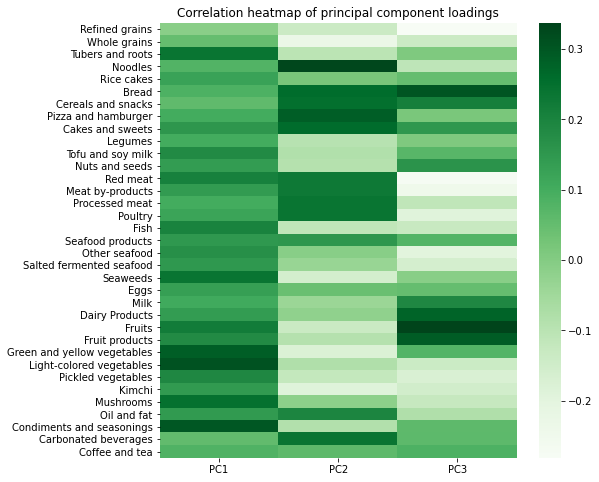

In [75]:
plt.figure(figsize=(8,8))
sns.heatmap(loadings_df, cmap='Greens')
plt.title("Correlation heatmap of principal component loadings")
plt.ylabel("")
plt.show()

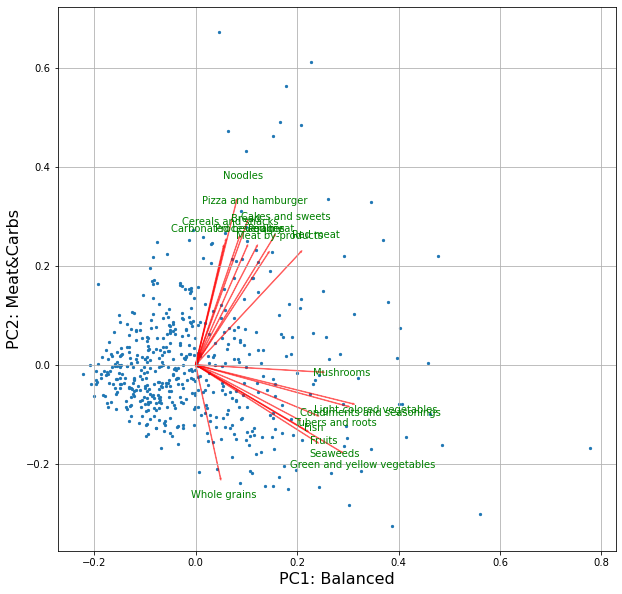

In [85]:
def myplot(score,coeff, p1, p2, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    #min-max scaling for better visualization
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    #plot
    plt.figure(figsize=(10,10))
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        if abs(coeff[i,0])>0.2 or abs(coeff[i,1])>0.2:
            plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
            if labels is None:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
            else:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    
    pcs = ['Balanced', 'Meat&Carbs','Fruits&Dairy']
    xlab = pcs[p1-1]
    ylab = pcs[p2-1]
    plt.xlabel("PC{}: {}".format(p1, xlab), fontsize=16)
    plt.ylabel("PC{}: {}".format(p2, ylab), fontsize=16)
    plt.grid()

myplot(x_pca[:,0:2], np.transpose(pca_out.components_[0:2, :]),1,2,food_group_name)
plt.show()

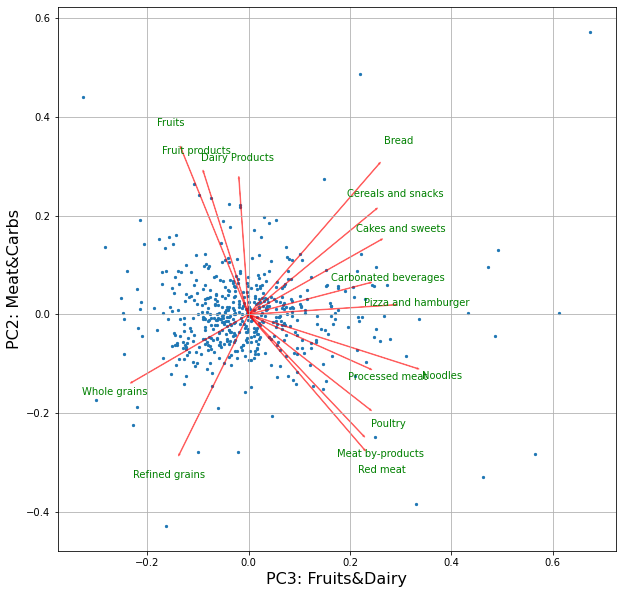

In [86]:
myplot(x_pca[:,1:3],np.transpose(pca_out.components_[1:3, :]),3,2,food_group_name)

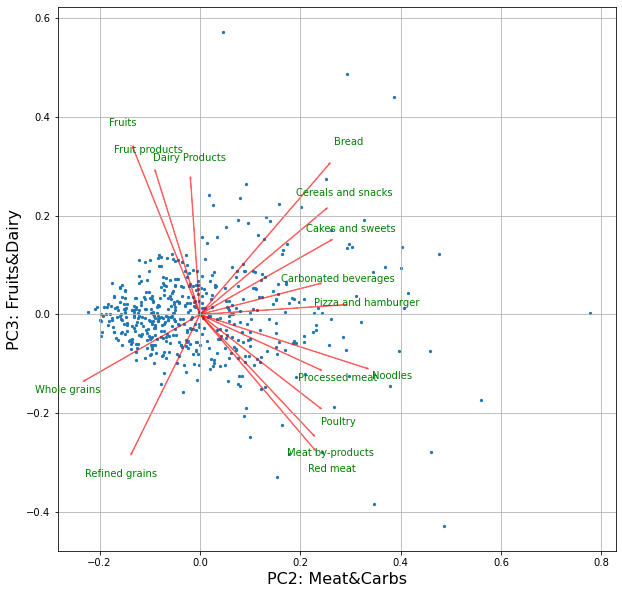

In [89]:
myplot(x_pca[:,[0,2]],np.transpose(pca_out.components_[1:3, :]),2,3,food_group_name)

### 2) Exploratory Factor Analysis

In [ ]:
from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo

#### Assumption checking

1. Bartlett’s test of sphericity 
- H0: The null hypothesis of the test is that the variables are orthogonal, i.e. not correlated. 
- H1: The alternative hypothesis is that the variables are not orthogonal, i.e. they are correlated enough to where the correlation matrix diverges significantly from the identity matrix. 

In [ ]:
calculate_bartlett_sphericity(x) #Bartlett's test significant -> suitable for PCA & factor analysis

2. Kaiser-Meyer-Olkin (KMO) Test 
- measures the suitability of data for factor analysis. 
- determines the adequacy for each observed variable and for the complete model. 
- KMO estimates the proportion of variance among all the observed variable, and range between 0 and 1. Lower proportion id more suitable for factor analysis. 
- Value of KMO less than 0.6 is considered inadequate.

In [ ]:
calculate_kmo(x) #kmo > 0.6

#### Get appropriate # of factors

In [ ]:
df2.columns

In [ ]:
x = df3.drop(columns=['CAN_ID'])
fa = FactorAnalyzer(35, rotation='oblimin')
fa.fit(x)

def scree_plot_fa(fa): 
    ind = np.arange(35) 
    vals, n = fa.get_eigenvalues()
    plt.plot(ind, vals)
    plt.scatter(ind, vals)
    plt.xlabel('Factors')
    plt.ylabel('Eigenvalue')
    plt.title('Scree plot')

scree_plot_fa(fa) #Choose n_factors=3

In [ ]:
fa = FactorAnalyzer(n_factors=3,rotation='oblimin')
fa.fit(x)
factor_df=pd.DataFrame(fa.loadings_,index=food_group_name)
factor_df.columns= ['Traditional', 'Western', 'Fruit&Dairy']
factor_df.style.highlight_max(color = 'lightgreen', axis = 1)

In [ ]:
factor_df2 = factor_df.copy()
for col in factor_df2.columns:
    factor_df2[col].values[factor_df2[col].values < 0.2] = 0
factor_df2 = factor_df2.replace(0,'-')
dfi.export(factor_df2, "factor_oblimin.png")
factor_df2

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(factor_df, cmap='Greens')
plt.title("Correlation heatmap of factor loadings")
plt.ylabel("")
plt.show()

### 3) K-means clustering

In [ ]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [ ]:
wcss=[]
for k in range(2,8):
    kmeans = KMeans(
        init="k-means++", #look for convergence
        n_clusters = k,
        max_iter=300,
        algorithm='auto', #lloyd algorithm
        random_state=2022)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

def scree_plot_kmeans(wcss):
    k = range(2,8)
    plt.plot(k,wcss)
    plt.scatter(k,wcss)
    plt.title('Scree Plot')
    plt.xlabel('# of clusters')
    plt.ylabel('WCSS')
    
scree_plot_kmeans(wcss)

In [ ]:
k_means = KMeans(init="k-means++", n_clusters=3)
k_means.fit(x_scaled)

In [ ]:
print("Lowest SSE value: ",k_means.inertia_)
#print("Centroids for each center: ",k_means.cluster_centers_)
print("The number of iterations required to converge:", k_means.n_iter_)

### Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
linked = linkage(x_scaled.transpose(), 'ward')
labels = food_group_name

plt.figure(figsize=(17, 10))
dendrogram(linked,labels=labels)
plt.axhline(y=40, c='k', linestyle='--') 
plt.show()

## 참고자료
- [식품군 분류 기준](https://www.sciencedirect.com/science/article/abs/pii/S2212267220314581?via%3Dihub)
- [Factor Analysis using Python](https://www.datacamp.com/tutorial/introduction-factor-analysis)